In [12]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'quiet-axon-410108' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=quiet-axon-410108:US:bquxjob_171d14c6_18cee5b8912)
back to BigQuery to edit the query within the BigQuery user interface.

In [13]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2e52917a_18cee7070da') # Job ID inserted based on the query results selected to explore
print(job.query)



select position_id,
  jd,
  split(split(jd,'주요업무')[safe_offset(1)],'자격요건')[safe_offset(0)] as responsibilities,
  split(split(split(jd,'주요업무')[safe_offset(1)],'자격요건')[safe_offset(1)],'우대사항')[safe_offset(0)] as  requirments,
  split(split(split(split(jd,'주요업무')[safe_offset(1)],'자격요건')[safe_offset(1)],'우대사항')[safe_offset(1)],'혜택 및 복' )[safe_offset(0)] as preference,
  split(split(split(split(jd,'주요업무')[safe_offset(1)],'자격요건')[safe_offset(1)],'우대사항')[safe_offset(1)],'혜택 및 복' )[safe_offset(1)] as benefits,
  annual_from,
  annnual_to

from freeo_data01.wanted_position



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [14]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2e52917a_18cee7070da') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results.head(1)

,position_id,jd,responsibilities,requirments,preference,benefits,annual_from,annnual_to
0,164858,기술개발본부 팀장급 또는 관리자 채용\n\n\n주요업무\n- 기업부설연구소 조직 관...,\n- 기업부설연구소 조직 관리\n- 사업목표에 따른 기술 개발 실무 대응\n- 데...,\n- 석사이상\n- 정보관리 기술사(클라우드 및 ICT 기술) \n- 정보처리기사...,"\n앱,웹, 인프라 등 it 조직 관리업무 가능자 우대\n\n","지\n주5일근무,연차,경조휴가, 직금 ,각종경조금지원\n건강검진,4대보험, 휴게실,...",18,25


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [15]:
results.describe()

,position_id,jd,responsibilities,requirments,preference,benefits,annual_from,annnual_to
count,913,913,913,896,859,850,913,913
unique,913,867,823,820,774,670,12,25
top,164858,Lumanlab - 국내 최초 영유아 발달 분야 전문 플랫폼 기업 \n\n루먼랩은 ...,\n• 딥러닝 기반 Human Action Analysis 모델링\n• 사용자 데이...,\n• 제약회사/CRO/병의원/헬스케어회사 및 기관에서 임상 연구(데이터 분석) 경...,"\n• Computer Vision 관련 직무 경험(Object Detection,...","지\n• 가족들의 단체 상해보험 지원\n (본인, 배우자, 양가 부모님, 자녀 ...",3,10
freq,1,5,7,6,7,10,246,319


In [16]:
results.dtypes

position_id         object
jd                  object
responsibilities    object
requirments         object
preference          object
benefits            object
annual_from         object
annnual_to          object
dtype: object

## **전처리**

In [17]:
import pandas as pd
import numpy as np

In [18]:
df  = results.copy()
print(df.shape)
print(df.columns)

(913, 8)
Index(['position_id', 'jd', 'responsibilities', 'requirments', 'preference',
       'benefits', 'annual_from', 'annnual_to'],
      dtype='object')


In [19]:
df['annual_from'] = df['annual_from'].astype(int) # 정수로 변환
df['annnual_to'] = df['annnual_to'].astype(int)

In [20]:
df.drop(labels=['preference','benefits','jd'], axis=1, inplace=True)

In [21]:
df['responsibilities']= df['responsibilities'].replace(np.nan,'공백제거')
df['requirments']= df['requirments'].replace(np.nan,'공백제거')

#텍스트 주요 키워드

In [22]:
!pip install krwordrank

In [23]:
from krwordrank.word import KRWordRank

In [24]:
get_list = df['responsibilities'].values.tolist()

print(get_list[0])


- 기업부설연구소 조직 관리
- 사업목표에 따른 기술 개발 실무 대응
- 데이터 기술 개발 및 R&D 전략 
- 기획 및 기술 로드맵
- 정보기술 관리




In [25]:
# 조건부
min_count = 5
max_length = 10
verbose = True

wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length, verbose=verbose)

In [26]:
beta = 0.85
max_iter =10
# keyword
# rank
# graph
keyword, rank, graph = wordrank_extractor.extract(get_list, beta, max_iter)

scan vocabs ... 
num vocabs = 7087
done


In [27]:
for word, r in sorted(keyword.items(), key= lambda x : x[1] , reverse=True)[:30]:
    print("%s:\t%.3f"%(word,r)) # 각 단어의 비율을 보여준다.(내림차순)

and:	70.598
데이터:	70.340
분석:	36.876
위한:	27.677
to:	25.781
개발:	23.360
the:	21.312
서비스:	16.706
기반:	16.449
모델:	16.378
of:	15.447
다양한:	12.712
통한:	12.249
for:	11.327
통해:	10.159
in:	9.784
대한:	9.721
비즈니스:	9.461
프로:	9.169
구축:	8.848
설계:	8.814
업무:	8.598
고객:	8.304
활용한:	8.160
도출:	7.960
관리:	7.899
인사이트:	7.861
관련:	7.597
지표:	7.293
개선:	6.713


In [28]:
# 제외단어
stopwords = ['and', '데이터', '분석', '위한', 'to', '개발', '서비스', 'the', '모델', '대한', '다양']

passwords = {
    word : score for word, score in sorted(
        keyword.items(), key = lambda x: -x[1])[:300] if not (word in stopwords)
}

In [29]:
for word, r in sorted(passwords.items(), key= lambda x : x[1] , reverse=True)[:30]:
    print("%s:\t%.3f"%(word,r)) # 각 단어의 비율을 보여준다.(내림차순)

기반:	16.449
of:	15.447
다양한:	12.712
통한:	12.249
for:	11.327
통해:	10.159
in:	9.784
비즈니스:	9.461
프로:	9.169
구축:	8.848
설계:	8.814
업무:	8.598
고객:	8.304
활용한:	8.160
도출:	7.960
관리:	7.899
인사이트:	7.861
관련:	7.597
지표:	7.293
개선:	6.713
AI:	6.595
business:	6.520
추천:	6.350
알고리즘:	6.126
수행:	6.114
위해:	6.060
의사:	6.057
있는:	6.000
연구:	5.640
필요한:	5.633


# 시각화

In [30]:
#한글폰트 지원
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina' # 그래프의 이미지 해상도 설정

!apt -qq -y install fonts-nanum # 나눔 폰트 설치
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

fe = fm.FontEntry(
    fname = path,
    name = 'NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18,'font.family':'NanumGothic'})

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


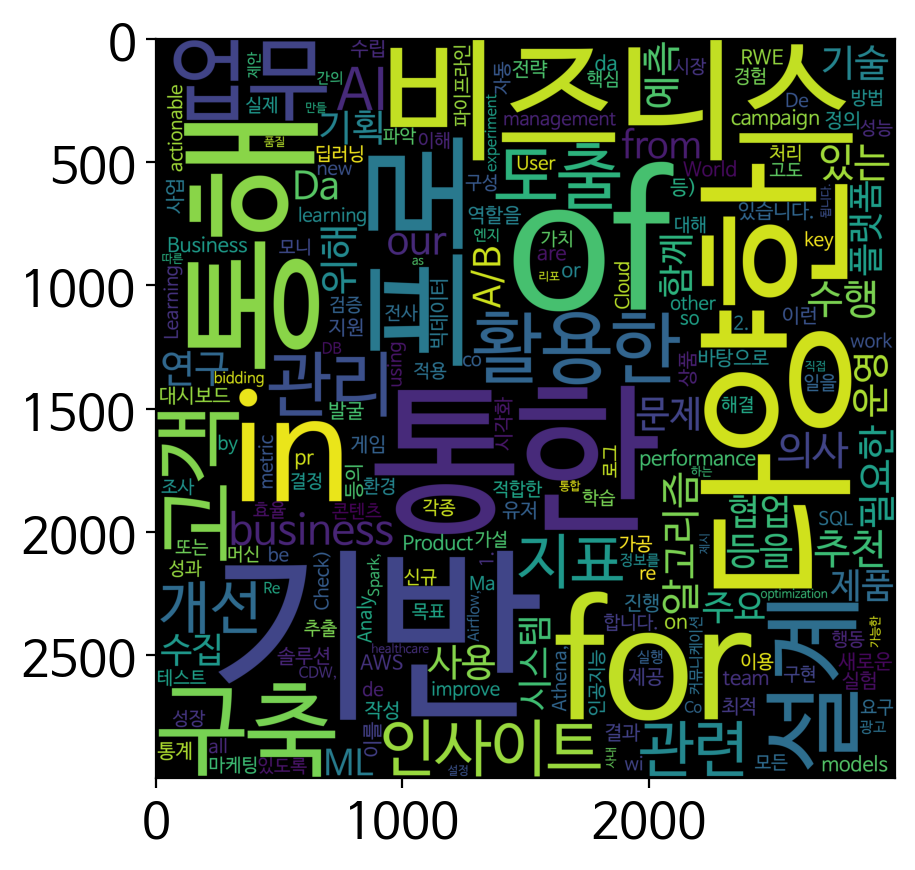

In [31]:
from wordcloud import WordCloud
# 역할에 대한 워드 클라우드
wc = WordCloud(
    font_path= path,
    width= 1000,
    height=1000,
    scale=3.0,
    max_font_size= 250)
gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)

# 기업 요구사항에 대한 워드클라우드

scan vocabs ... 
num vocabs = 6388
done


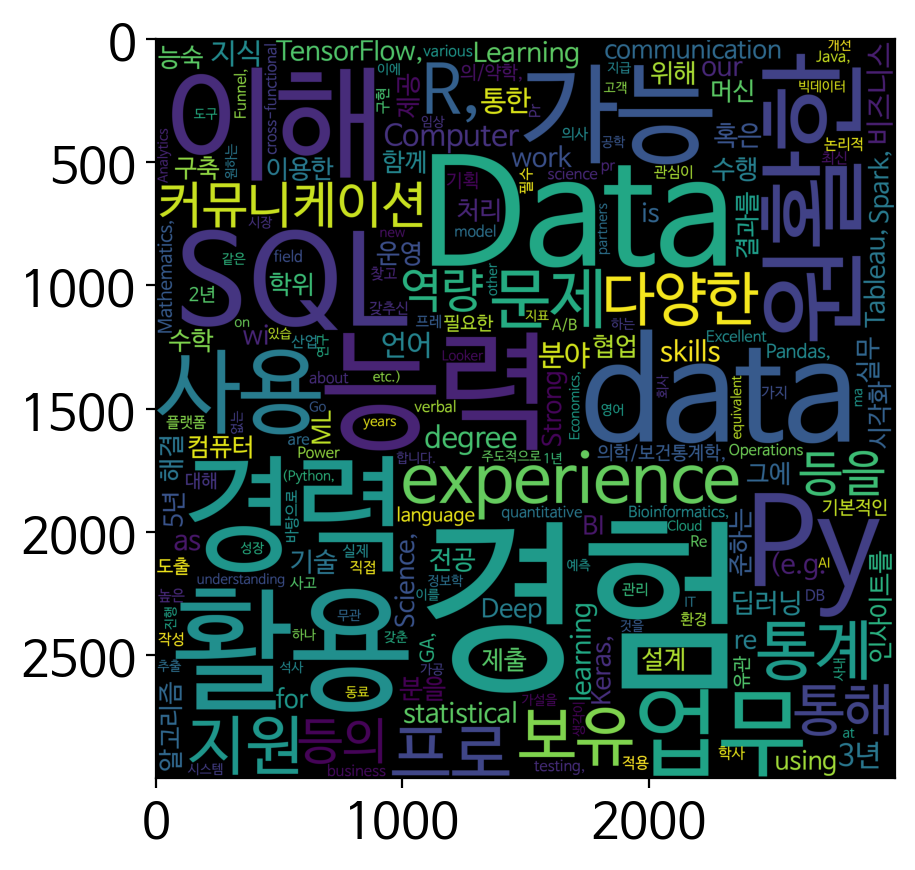

In [32]:
get_list_r = df['requirments'].values.tolist()
# 조건부
min_count = 5
max_length = 10
verbose = True
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length, verbose=verbose)

beta = 0.85
max_iter =10
# keyword : 텍스트에 추출한 단
# rank : 텍스트 점
# graph
keyword, rank, graph = wordrank_extractor.extract(get_list_r, beta, max_iter)
# 제외단어
stopwords = ['이상','and', '데이터', '분석', '위한', 'to','기반','of','or','in','프','관련', '개발', '서비스', 'the', '모델', '대한', '다양','또','또는','등)','있는',"있으"]

passwords = {
    word : score for word, score in sorted(
        keyword.items(), key = lambda x: -x[1])[:300] if not (word in stopwords)
}
# 기업의 요구사항
gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)

# 경력 0~ 1년차

scan vocabs ... 
num vocabs = 509
done


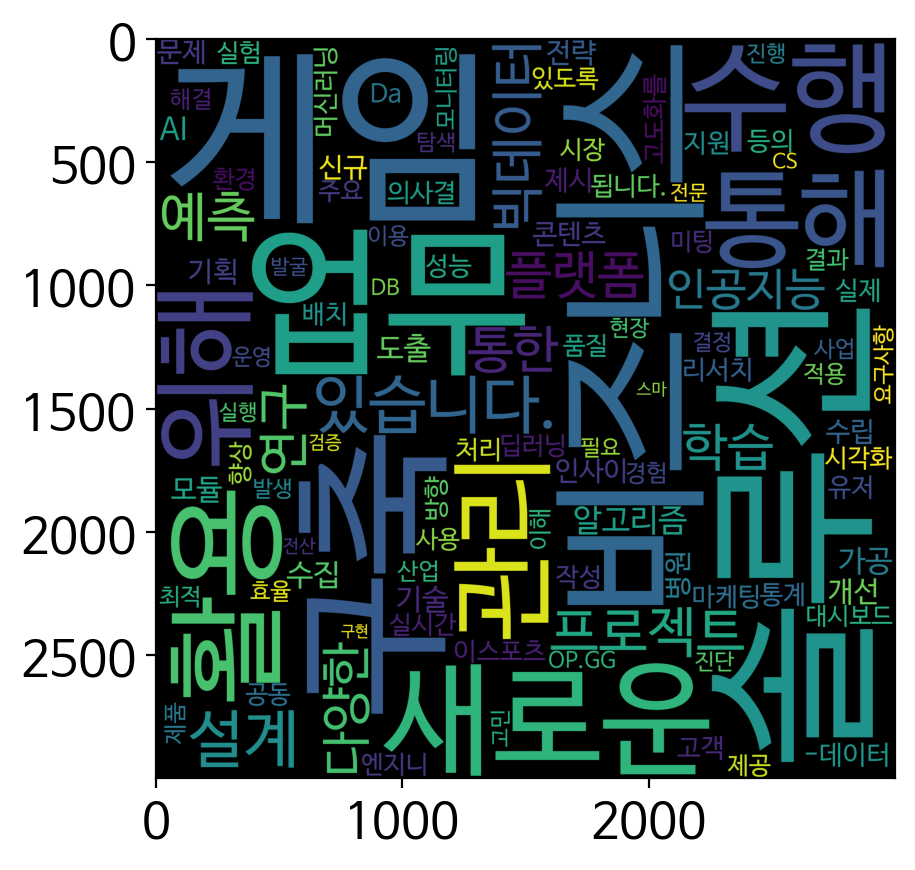

In [33]:
get_list_new = df[(df['annual_from']>=0) & (df['annnual_to']<=1)  ]['responsibilities'].values.tolist()
# 조건부
min_count = 5
max_length = 10
verbose = True
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length, verbose=verbose)

beta = 0.85
max_iter =10
# keyword : 텍스트에 추출한 단
# rank : 텍스트 점
# graph
keyword, rank, graph = wordrank_extractor.extract(get_list_new, beta, max_iter)
# 제외단어
stopwords = ['이상','and', '데이터', '분석', '위한', 'to','기반','of','or','in','프','관련', '개발', '서비스', 'the', '모델', '대한', '다양','또','또는','등)','있는',"있으"]

passwords = {
    word : score for word, score in sorted(
        keyword.items(), key = lambda x: -x[1])[:300] if not (word in stopwords)
}

gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)

# 주요 업무 0~ 1년차

scan vocabs ... 
num vocabs = 392
done


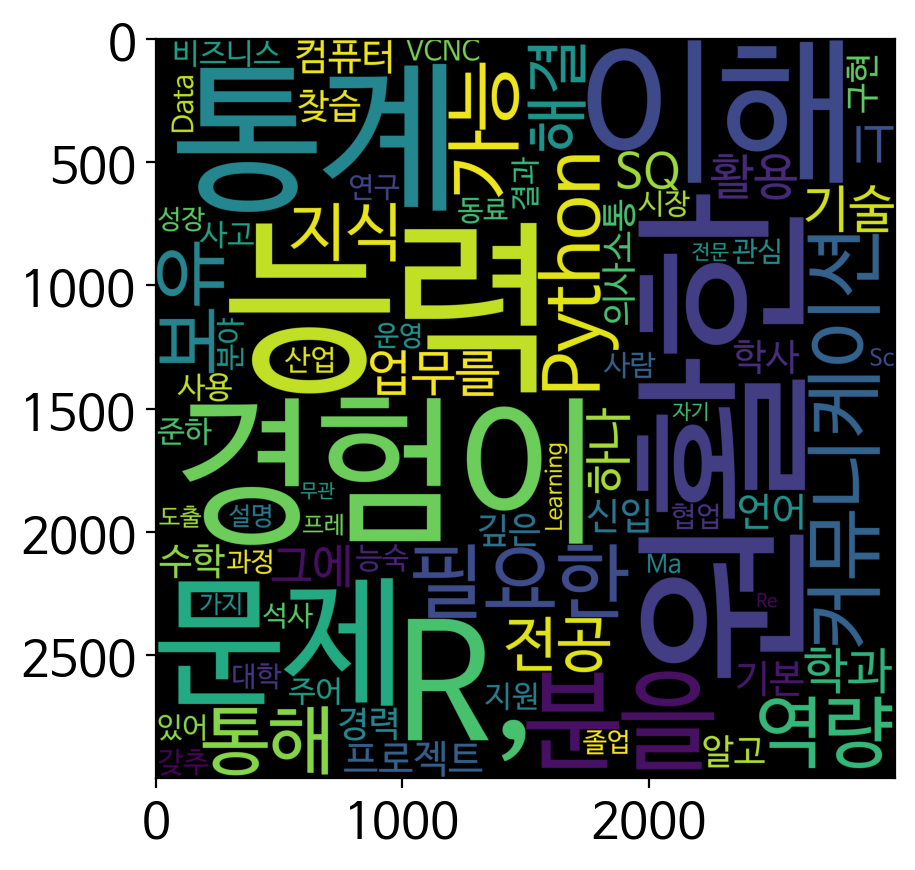

In [34]:
get_list_new2 = df[(df['annual_from']>=0) & (df['annnual_to']<=1)  ]['requirments'].values.tolist()
# 조건부
min_count = 5
max_length = 10
verbose = True
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length, verbose=verbose)

beta = 0.85
max_iter =10
# keyword : 텍스트에 추출한 단
# rank : 텍스트 점
# graph
keyword, rank, graph = wordrank_extractor.extract(get_list_new2, beta, max_iter)
# 제외단어
stopwords = ['이상','and', '데이터', '분석', '위한', 'to','기반','of','or','in','프','관련', '개발', '서비스', 'the', '모델', '대한', '다양','또','또는','등)','있는',"있으"]

passwords = {
    word : score for word, score in sorted(
        keyword.items(), key = lambda x: -x[1])[:300] if not (word in stopwords)
}

gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)

# GPT 사용 api 키 필요!

In [35]:
#!pip install openai

In [ ]:
import os
from openai import OpenAI
api_key = str(input())

In [37]:
os.environ["OPENAI_API_KEY"] = api_key

In [38]:
client = OpenAI(
    api_key= os.environ.get("OPENAI_API_KEY")
)

In [39]:
def papago(prompt):
    completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a translator. Please translate the message."},
        {"role": "user", "content": prompt}
    ]
    )

    answer =completion.choices[0].message.content
    return answer

In [41]:
papago("나는 현재 원티드플랫폼에서 데이터 챌린지 코스를 수강하고있어")

'I am currently taking the data challenge course on the Wanted platform.'

In [43]:
get_list_t = df[(df['annual_from']>=0) & (df['annnual_to']<=1)  ]['requirments'].values.tolist()
get_list_top10 = get_list_t[0:5]

translated_list = [papago(sentence) for sentence in get_list_top10]
translated_list[0]

"• We are looking for someone with experience in developing and applying models using big data such as Hadoop in a real service environment.\n• Proficiency in one or more programming languages such as Python, R, Scala, Java, and SQL, to analyze and model data, is required.\n• Experience in analyzing and selecting models and data for statistical analysis, machine learning, and deep learning, to achieve objectives, is necessary.\n• Experience in building and operating monitoring environments for platforms and data management is required.\n• We are looking for someone who can explain things clearly and kindly to experts in other fields, with strong communication skills.\n• We are seeking someone who enjoys collaborating, sharing knowledge with colleagues, and is not afraid of change, continuously learning new technologies, and growing.\n• We are looking for candidates with at least 5 years of development experience, or for new graduates, at least a master's degree or equivalent level of e

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS

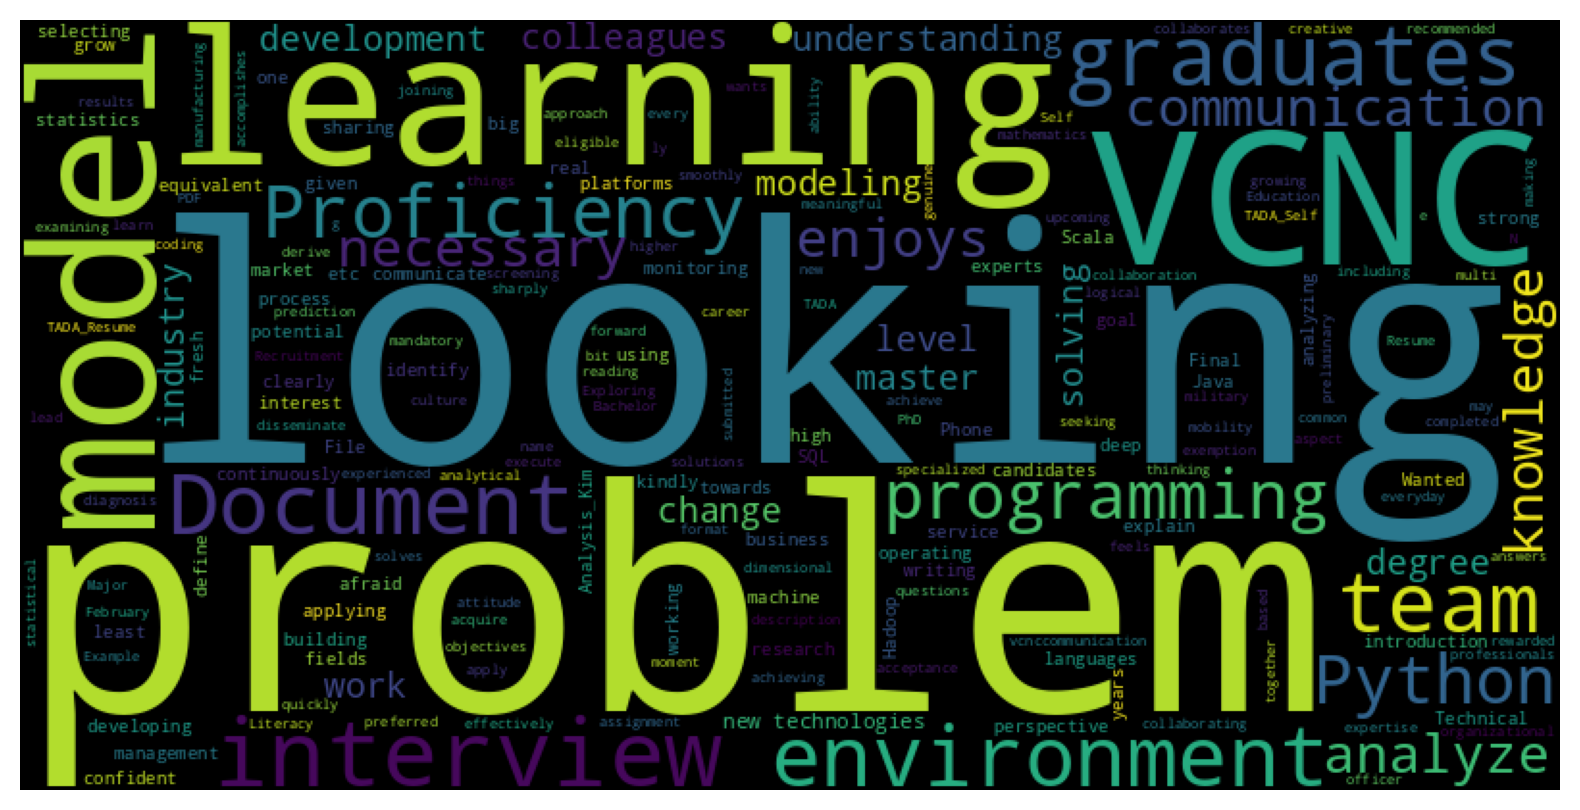

In [45]:
text_combined = '\n'.join(translated_list)

stopwords = set(['and', 'or', 'someone', 'the','is', 'for', 'on', 'in', 'with', 'related','data', 'required', 'experience', 'skills', 'analysis'])
stopwords.update(set(STOPWORDS))

wc = WordCloud(width= 800, height= 400, stopwords=stopwords).generate(text_combined)

plt.figure(figsize=(10 , 5))
plt.imshow(wc)
plt.axis('off')
plt.show()